Les imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import random
import time
from PIL import Image
from IPython.display import display, clear_output


In [2]:
# Définir les transformations pour les données
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Télécharger et charger les ensembles de données CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

#os.system("rundll32.exe powrprof.dll,SetSuspendState 0,1,0")
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Fonction pour afficher une image
def imshow(img):
    img = img / 2 + 0.5  # dénormaliser
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


In [47]:
def ajout_bruit_gaussien_n(img,b,n):
    a = [1 - b(i) for i in range(n)]
    a_ = 1
    for i in a:
        a_ *= i
    img = np.array(img)
    bruit = np.random.normal(0, (1 - a_)*255 , img.shape)
    img = img * np.sqrt(a_) + bruit
    img = np.clip(img, 0, 255)
    return Image.fromarray(img.astype(np.uint8))

In [5]:
# Obtenir une image de formation aléatoire
dataiter = iter(trainloader)
images, labels = next(dataiter)


'# Initialiser la figure\nplt.ion()\nfig = plt.figure()'

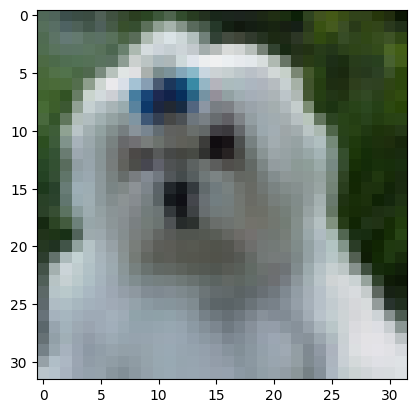

In [89]:
img = images[0]
image = transforms.ToPILImage()(img / 2 + 0.5)
imshow(img)

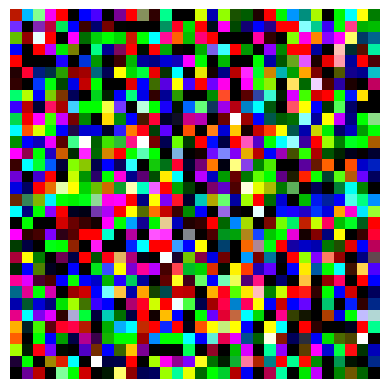

99


In [ ]:
img = images[0]
image = transforms.ToPILImage()(img / 2 + 0.5)
image_b = image.copy()
def b(x):
    l = np.linspace(0.001,0.1,100)
    #e = 0.1/(np.exp(-x/100)+1)
    return l[x]
for i in range(100):
    if i%1==0:
        # Effacer la sortie précédente
        clear_output(wait=True)
        # Afficher l'image
        npimg = np.array(image_b)
        
        plt.imshow(npimg)
        plt.axis('off')
        plt.show()
        print(i)
    #time.sleep(0.05)
    image_b = ajout_bruit_gaussien_n(image,b,i)